In [1]:
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.dates as mdates
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec

version = '2021-09-08'

data_folder = '../data/{}/'
version_folder = '../data/{}/version-{}/'
fit_folder = '../results/model_fit/{}/version-{}/target_{}/'
plot_folder = '../../../Papers/daily_rocof_profile_paper/figures/'

input_cols = ['gen_other', 'gen_solar', 'gen_wind_on', 'gen_waste', 'gen_nuclear',
       'gen_biomass', 'gen_gas', 'gen_run_off_hydro', 'gen_oil',
       'gen_pumped_hydro', 'gen_other_renew', 'gen_reservoir_hydro',
       'gen_hard_coal', 'gen_wind_off', 'gen_geothermal', 'gen_lignite',
       'load', 'gen_coal_gas', 'total_gen', 'synchronous_gen', 'load_ramp',
       'total_gen_ramp', 'other_ramp', 'solar_ramp', 'wind_on_ramp',
       'waste_ramp', 'nuclear_ramp', 'biomass_ramp', 'gas_ramp',
       'run_off_hydro_ramp', 'oil_ramp', 'pumped_hydro_ramp',
       'other_renew_ramp', 'reservoir_hydro_ramp', 'hard_coal_ramp',
       'wind_off_ramp', 'geothermal_ramp', 'lignite_ramp', 'coal_gas_ramp',
       'forecast_error_wind_on', 'forecast_error_wind_off',
       'forecast_error_solar', 'forecast_error_total_gen',
       'forecast_error_load', 'forecast_error_load_ramp',
       'forecast_error_total_gen_ramp', 'forecast_error_wind_off_ramp',
       'forecast_error_wind_on_ramp', 'forecast_error_solar_ramp',
       'solar_day_ahead', 'wind_on_day_ahead', 'scheduled_gen_total',
       'prices_day_ahead', 'load_day_ahead', 'wind_off_day_ahead', 'month',
       'weekday', 'hour', 'load_ramp_day_ahead', 'total_gen_ramp_day_ahead',
       'wind_off_ramp_day_ahead', 'wind_on_ramp_day_ahead',
       'solar_ramp_day_ahead', 'price_ramp_day_ahead','gen_fossil_peat','fossil_peat_ramp','residual']


input_col_names = ['Generation other', 'Solar generation', 'Onshore wind generation', 'Waste generation', 'Nuclear generation',
       'Biomass generation', 'Gas generation', 'Run-off-river hydro generation', 'Oil generation',
       'Pumped hydro generation', 'Other renewable generation', 'Reservoir hydro generation',
       'Hard coal generation', 'Wind offshore generation', 'Geothermal generation', 'Lignite generation',
       'Load', 'Coal gas generation', 'Total generation', 'Synchronous generation', 'Load ramp',
       'Total generation ramp', 'Other ramp', 'Solar ramp', 'Onshore wind ramp',
       'Waste ramp', 'Nuclear ramp', 'Biomass ramp', 'Gas ramp',
       'Run-off-river hydro ramp', 'Oil ramp', 'Pumped hydro ramp',
       'Other renewable ramp', 'Reservoir hydro ramp', 'Hard coal ramp',
       'Offshore wind ramp', 'geothermal_ramp', 'Lignite ramp', 'Coal gas ramp',
       'Forecast error onshore wind', 'Forecast error offshore wind',
       'Forecast error solar', 'Forecast error total generation',
       'Forecast error load', 'Forecast error load ramp',
       'Forecast error generation ramp', 'Forecast error offshore wind ramp',
       'Forecast error onshore wind ramp', 'Forecast error solar ramp',
       'Solar day-ahead', 'Onshore wind day-ahead', 'Scheduled generation',
       'Prices day-ahead', 'Load day-ahead', 'Offshore wind day-ahead', 'Month',
       'Weekday', 'Hour', 'Load ramp day-ahead', 'Generation ramp day-ahead',
       'Offshore wind ramp day-ahead', 'Onshore wind ramp day-ahead',
       'Solar ramp day-ahead', 'Price ramp day-ahead', 'Fossil peat generation', 'Fossil peat ramp', 'Residual']

input_col_names_units = ['Generation other [GW]', 'Solar generation [GW]', 'Onshore wind generation [GW]', 'Waste generation [GW]', 'Nuclear generation [GW]',
       'Biomass generation [GW]', 'Gas generation [GW]', 'Run-off-river hydro generation [GW]', 'Oil generation [GW]',
       'Pumped hydro generation [GW]', 'Other renewable generation [GW]', 'Reservoir hydro generation [GW]',
       'Hard coal generation [GW]', 'Wind offshore generation [GW]', 'Geothermal generation [GW]', 'Lignite generation [GW]',
       'Load [GW]', 'Coal gas generation [GW]', 'Total generation [GW]', 'synchronous_gen [GW]', 'Load ramp [GW/h]',
       'Total generation ramp [GW/h]', 'Other ramp [GW/h]', 'Solar ramp [GW/h]', 'Onshore wind ramp [GW/h]',
       'Waste ramp [GW/h]', 'Nuclear ramp [GW/h]', 'Biomass ramp [GW/h]', 'Gas ramp [GW/h]',
       'Run-off-river hydro ramp [GW/h]', 'Oil ramp [GW/h]', 'Pumped hydro ramp [GW/h]',
       'Other renewables ramp [GW/h]', 'Reservoir hydro ramp [GW/h]', 'Hard coal ramp [GW/h]',
       'Offshore wind ramp [GW/h]', 'geothermal_ramp [GW/h]', 'Lignite ramp [GW/h]', 'coal_gas_ramp [GW/h]',
       'Forecast error onshore wind [GW]', 'Forecast error offshore wind [GW]',
       'Forecast error solar [GW]', 'Forecast error total generation [GW]',
       'Forecast error load [GW]', 'Forecast error load ramp [GW]',
       'Forecast error generation ramp [GW/h]', 'Forecast error offshore wind ramp [GW/h]',
       'Forecast error onshore wind ramp [GW/h]', 'Forecast error solar ramp [GW/h]',
       'Solar day-ahead [GW]', 'Onshore wind day-ahead [GW]', 'Scheduled generation [GW]',
       'Prices day-ahead [Currency/MWh]', 'Load day-ahead [GW]', 'Offshore wind day-ahead [GW]', 'Month',
       'Weekday', 'Hour', 'Load ramp day-ahead [GW/h]', 'Generation ramp day-ahead [GW/h]',
       'Offshore wind ramp day-ahead [GW/h]', 'Onshore wind ramp day-ahead [GW/h]',
       'Solar ramp day-ahead [GW/h]', 'Price ramp day-ahead [Currency/MWh/h]','Fossil peat generation [GW]', 'Fossil peat ramp [GW/h]', 'Residual']

input_col_names = dict(zip(input_cols, input_col_names))
input_col_names_units = dict(zip(input_cols, input_col_names_units))
input_col_names_units_general = dict(zip(input_cols, input_col_names_units))

input_rescale_factors = pd.Series(index=input_cols, data=1/1000) # Rescale from MW to GW
input_rescale_factors.loc[['weekday', 'hour','month', 'prices_day_ahead','price_ramp_day_ahead']]=1



In [22]:
area='CE'
targ = 'f_rocof'

# Define colors for paper figures
chydro,  crocof, cpred, chour, cerrorgen,cpriceramp , chardcoal,cload, csolar ,  crunoff  = sns.color_palette("colorblind", 10)
cfreq = 'k'
cresidual = 'yellowgreen'

# Load data

In [3]:
# Grid frequency recordings (This data is only used for fig.1 and it is available on https://zenodo.org/record/3744121)
raw_freq = -50 + pd.read_hdf('../../Frequency_data_preparation/TransnetBW/cleansed_2015-01-01_to_2019-12-31.h5').loc['2015-01-01':'2019-12-31']

# Target and feature data
X_train = pd.read_hdf(version_folder.format(area, version)+'X_train.h5')
y_train = pd.read_hdf(version_folder.format(area, version)+'y_train.h5').loc[:,targ]
X_test = pd.read_hdf(version_folder.format(area, version)+'X_test.h5')
y_test = pd.read_hdf(version_folder.format(area, version)+'y_test.h5').loc[:,targ]
y_pred_test = pd.read_hdf(fit_folder.format(area, version,targ)+'y_pred_test.h5')

# SHAP values
shap_vals = np.load(fit_folder.format(area, version, targ)+ 'shap_values_gtb.npy')
shap_vals = pd.DataFrame(data=shap_vals, index=X_test.index, columns=X_test.columns)

In [8]:
X_train.shape

(21464, 54)

# Figure 1

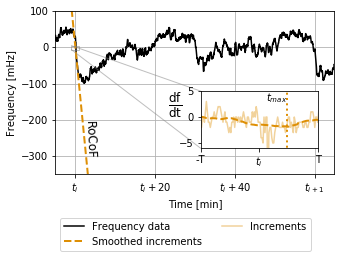

In [8]:
# Setup
fig, ax = plt.subplots(figsize=(5,3.))
ind = pd.Timestamp('2017-04-20 22:00:00', tz='CET')
f = lambda x,a,b: a*x + b

# Plot grid frequency recording
l1 = ax.plot(np.arange(-5*60, 3601+5*60)/60, raw_freq.loc[ind-pd.DateOffset(minutes=5):ind+pd.DateOffset(minutes=65)]*1000,  label='20 April 2017', c=cfreq)[0]
ax.grid()

# Determine rocof like in our rocof ectraction routine
smoothed_df_dt = raw_freq.loc[ind-pd.DateOffset(minutes=60):ind+pd.DateOffset(minutes=60)].diff().rolling(60 , center=True).mean()
smoothed_df_dt_window =smoothed_df_dt.loc[ind-pd.DateOffset(minutes=1):ind+pd.DateOffset(minutes=1)]
arg_ext = np.argmax(smoothed_df_dt_window.abs().values)
rocof = smoothed_df_dt_window.iloc[arg_ext]

# Plot rocof estimate
ax.plot(np.arange(-5*60, 5*60)/60,
        f(np.arange(-5*60, 5*60), rocof, 0)*1000,
        '--', lw=2, c=crocof)
xticklab = [r'$t_i$',r'$t_i + 20$',r'$t_i + 40$', r'$t_{i+1}$']
plt.xticks([0,20,40,60], xticklab)

# Make inset for rocof increments
axins = ax.inset_axes([0.52, 0.16, 0.42, 0.35])
l2 = axins.plot(np.arange(-5*60, 3601)/60, raw_freq.loc[ind-pd.DateOffset(minutes=5):ind+pd.DateOffset(minutes=60)].diff()*1000,c=crocof, lw=1.5, alpha=0.4)[0]
l3 = axins.plot(np.arange(-3600, 3601)/60, smoothed_df_dt*1000, '--', c=crocof, lw=2.)[0]
axins.plot([arg_ext/60-1, arg_ext/60-1], [-7,6], ':',c=crocof, lw=2.)
axins.set_ylim([-6,5])
axins.set_ylabel(r'$\frac{\rm{d}f}{\rm{d}t}$',rotation=0, fontsize=17)
x1, x2 = -1, 1
axins.set_xlim(x1, x2)
ax.indicate_inset_zoom(axins)
axins.annotate(r'$t_{max}$', (0.11, 3))
axins.set_xticklabels(['-T',r'$t_i$','T'])


# Labels etc
plt.annotate(r'RoCoF', (2,-300), rotation=-88, fontsize=12)
ax.set_ylabel('Frequency [mHz]')
ax.set_xlabel('Time [min]')
ax.set_ylim([-350,100])
plt.autoscale(enable=True, axis='x', tight=True)


ax.legend([l1,l3,l2], ['Frequency data', 'Smoothed increments', 'Increments'], bbox_to_anchor = (-0.0,-0.5,1,1), ncol=2)
#plt.savefig(plot_folder+ 'fig1.pdf', bbox_inches='tight', dpi=220)

# Figure 2

Load-based model performance:  0.37613411188458645
Load-based model with bias performance:  0.5223104890881932
Hours of sign mismatch load-based model:  [[ 4]
 [ 9]
 [10]
 [11]
 [16]]
Hours of sign mismatch load-based model with bias:  [[ 9]
 [16]
 [17]
 [18]
 [19]]


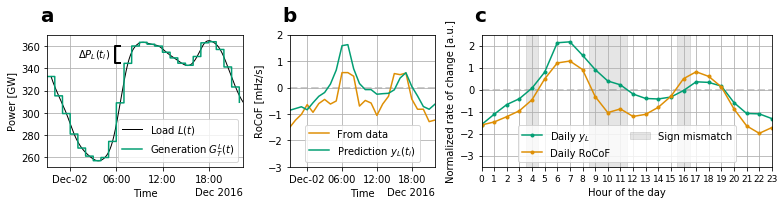

In [13]:
# Borders to mark mismatch hours
mismatch_hour_areas = [(3.5,4.5), (8.5,11.5),(15.5,16.5)]

fig = plt.figure( figsize=(11,3.))
gs = gridspec.GridSpec(1, 3, width_ratios=[1.35,1, 2],)


### ax1 - Step function visualization ###

plt.subplot(gs[0])
start = '2016-12-01 21:00:00' 
end = '2016-12-02 22:00:00' 

# Calculate smoothly interpolated load 
smooth_load = X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[start:end].load
smooth_load.index += pd.DateOffset(minutes=30)
smooth_load = smooth_load.resample('1min').interpolate(method='cubic')

# Calculate proxy of step-wise genration (including import-export and storages)
gen_imports_storage = X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[start:end].load
gen_imports_storage = gen_imports_storage.resample('1min').ffill(59)
smooth_load.index = smooth_load.index.tz_localize(None)
gen_imports_storage.index = gen_imports_storage.index.tz_localize(None)

# Plot
plt.plot(smooth_load, label=r'Load $L(t)$', c='k', lw=1)
plt.plot(gen_imports_storage, label=r'Generation $G_T^L(t)$', c=cpred)
plt.grid()
plt.ylabel('Power [GW]')
plt.xlabel('Time')
plt.legend(loc='lower right')
locator = mdates.AutoDateLocator(minticks=4, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator, offset_formats=['', '%Y', '%Y-%b', '%b %Y', '%b %Y', '%Y-%b-%d %H:%M'])
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
dt = pd.DateOffset(minutes=40)
show_time = gen_imports_storage.index[11*60]-pd.DateOffset(minutes=90)
load_val_0, load_val_1 =  gen_imports_storage.iloc[11*60-1], gen_imports_storage.iloc[11*60]
plt.plot([show_time, show_time-dt, show_time-dt, show_time], [load_val_0,load_val_0, load_val_1, load_val_1], lw=2, c='k')
plt.text(show_time-5*dt, (load_val_1+load_val_0)*.5, r"$\Delta P_L (t_i)$", ha='center', va='center')
plt.autoscale(enable=True, axis='x', tight=True)
plt.annotate('a', (-0.05/1.3,1.1), fontweight='bold', xycoords='axes fraction', fontsize=20)

##### ax2 - Sample prediction #####

plt.subplot(gs[1])

# Fit load-based model
f = lambda x,a: a*x
popt, pcov = curve_fit(f, X_train.load_ramp.values, y_train.values)
y_pred_test_dPL = f(X_test.load_ramp, *popt)
dPL_r2_score = r2_score(y_pred=y_pred_test_dPL, y_true=y_test)
print('Load-based model performance: ', dPL_r2_score)

# Plot
plt.plot(y_test.loc[start:end].index.tz_localize(None),y_test.loc[start:end].values*1000,'-',   c=crocof, label='From data')
plt.plot(y_test.loc[start:end].index.tz_localize(None),y_pred_test_dPL.loc[start:end].values*1000,'-',  c=cpred, label='Prediction $y_L(t_i)$')
locator = mdates.AutoDateLocator(minticks=5, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator, offset_formats=['', '%Y', '%Y-%b', '%b %Y', '%b %Y', '%Y-%b-%d %H:%M'])
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.ylabel('RoCoF [mHz/s]')
plt.grid()
plt.legend(loc='lower center')
plt.xlabel('Time')
plt.ylim([-3,2.])
plt.plot([gen_imports_storage.index[0], gen_imports_storage.index[-1]],[0,0],'--', color='k', alpha=0.2, zorder=-100, lw=2)
plt.autoscale(enable=True, axis='x', tight=True)
plt.annotate('b', (-0.05,1.1), fontweight='bold', xycoords='axes fraction', fontsize=20)

# Fit load-based model with bias as comparison
f = lambda x,a,b: a*x+b
popt, pcov = curve_fit(f, X_train.load_ramp.values, y_train.values)
y_pred_test_dPL_bias = f(X_test.load_ramp, *popt)
print('Load-based model with bias performance: ', r2_score(y_pred=y_pred_test_dPL_bias, y_true=y_test))


##### ax3 - daily profile #####

plt.subplot(gs[2])

# calculate daily profiles
daily_dPL = y_pred_test_dPL.groupby(y_pred_test_dPL.index.hour).mean()
daily_dPL_bias = y_pred_test_dPL_bias.groupby(y_pred_test_dPL_bias.index.hour).mean()
daily_rocof = y_test.groupby(y_test.index.hour).mean()

# plot normalized values
daily_dPL.div(daily_dPL.std()).plot(label=r'Daily $y_L$', c=cpred, style='.-')
daily_rocof.div(daily_rocof.std()).plot(grid=True, label='Daily RoCoF', c=crocof, style='.-')
plt.plot([0,23],[0,0],'--', color='k', alpha=0.2, zorder=-100, lw=2)
plt.ylim([-3.5,2.5])
ymin, ymax = plt.gca().get_ylim()
for i,(x1,x2) in enumerate(mismatch_hour_areas):
    mylabel = 'Sign mismatch' if i==0 else '_nolegend_'
    plt.fill_between((x1,x2), [ymin,ymin],[ymax,ymax], color='k', alpha=0.1, label=mylabel)
plt.ylim([ymin,ymax])
_=plt.xticks(np.arange(24), fontsize=9)
plt.legend(ncol=2, loc='lower center')
plt.ylabel('Normalized rate of change [a.u.]')
plt.xlabel('Hour of the day')
plt.annotate('c', (-0.05/2,1.1), fontweight='bold', xycoords='axes fraction', fontsize=20)
print('Hours of sign mismatch load-based model: ', np.argwhere((daily_dPL*daily_rocof<0).values))
print('Hours of sign mismatch load-based model with bias: ', np.argwhere((daily_dPL_bias*daily_rocof<0).values))

plt.tight_layout(h_pad=0.1)

plt.savefig(plot_folder+ 'fig2.pdf', bbox_inches='tight', dpi=220)

# Figure 3

In [6]:
# performance of ML model
print(r2_score(y_pred=y_pred_test.gtb, y_true=y_test))

0.7291402236315784


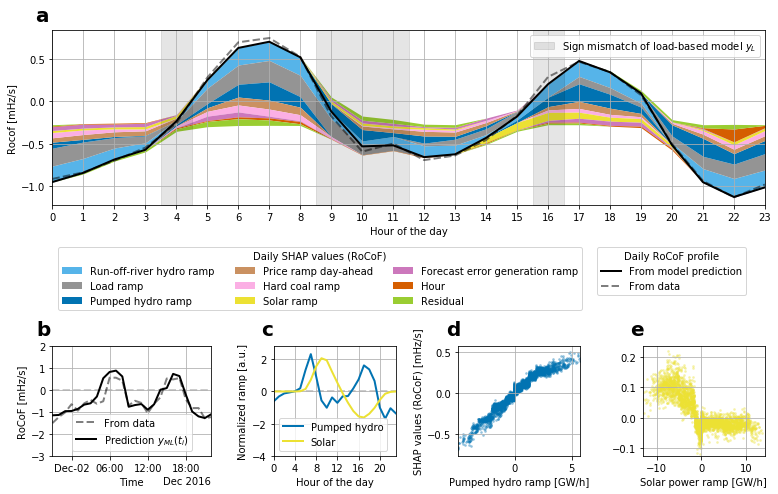

In [27]:
# Setup
fig = plt.figure(figsize=(11,7.))
fcolors = {'run_off_hydro_ramp': crunoff ,
            'load_ramp': cload,
            'pumped_hydro_ramp':chydro,
            'price_ramp_day_ahead':cpriceramp,
            'solar_ramp': csolar,
            'forecast_error_total_gen_ramp': cerrorgen,
            'residual': cresidual,
            'hour':chour,
            'hard_coal_ramp':chardcoal}

mismatch_hour_areas = [(3.5,4.5), (8.5,11.5),(15.5,16.5)]
gs = gridspec.GridSpec(2, 4,
                       width_ratios=[1.3,1, 1,1],
                       height_ratios=[1.6, 1]
                       )

start = '2016-12-01 21:00:00' 
end = '2016-12-02 22:00:00' 


### daily profile explanation #######

plt.subplot(gs[0,:])

max_select=8

# calculate base value for SHAP explanations
base_value = y_pred_test.gtb.mean()
    
# Calculate daily profiles
daily_rocof_profile = y_test.groupby(y_test.index.hour).mean()
shap_vals_daily_profile = shap_vals.groupby(shap_vals.index.hour).mean() 

# select most important daily SHAP values
most_important_features = shap_vals_daily_profile.abs().sum().sort_values().iloc[-max_select:].index
shap_vals_daily_profile_selected = shap_vals_daily_profile.reindex(columns=most_important_features[::-1])
shap_vals_daily_profile_selected.loc[:,'residual'] = shap_vals_daily_profile.drop(columns=most_important_features,errors='ignore').sum(1)

# Split into positive and negative daily SHAP values
posvals = shap_vals_daily_profile_selected.where(shap_vals_daily_profile_selected<0, 0)
negvals = shap_vals_daily_profile_selected.where(shap_vals_daily_profile_selected>0, 0)

l1=plt.plot(np.arange(24),base_value*1000 + shap_vals_daily_profile_selected.sum(1)*1000, lw=2, c='k')
l2=plt.plot(np.arange(24),daily_rocof_profile*1000, '--', lw=2,alpha=0.5, c='k')

# Plot positive shap values
baseline = shap_vals_daily_profile_selected.sum(axis=1) + base_value
for i,col in enumerate(shap_vals_daily_profile_selected.columns):
    plt.fill_between(np.arange(24), baseline*1000, baseline*1000- posvals.iloc[:,i]*1000,
                        color=fcolors[col], lw=0)
    baseline=baseline-posvals.iloc[:,i]

# Plot negative shap values
baseline = shap_vals_daily_profile_selected.sum(axis=1) + base_value
for i,col in enumerate(shap_vals_daily_profile_selected.columns):
    plt.fill_between(np.arange(24), baseline*1000, baseline*1000- negvals.iloc[:,i]*1000,
                        color=fcolors[col], lw=0,
                        label=input_col_names[negvals.iloc[:,i].name])
    baseline=baseline-negvals.iloc[:,i]

# Labels, legend etc
ymin, ymax = plt.gca().get_ylim()
for i,(x1,x2) in enumerate(mismatch_hour_areas):
    l3 = plt.fill_between((x1,x2), [ymin,ymin],[ymax,ymax], color='k', alpha=0.1)
plt.ylim([ymin,ymax])
_=plt.xticks(np.arange(24))
plt.grid()
plt.xlabel('Hour of the day')
plt.ylabel('Rocof [mHz/s]')
plt.xlim([0,23])
leg0=plt.legend([l3],['Sign mismatch of load-based model $y_L$'])
leg1=plt.legend(bbox_to_anchor=(0.75,- 0.21,0,0), title='Daily SHAP values (RoCoF)', ncol=3)
leg2=plt.legend(l1+l2,['From model prediction', 'From data'],bbox_to_anchor=(0.98,- 0.21,0,0), title='Daily RoCoF profile')
plt.gca().add_artist(leg0)
plt.gca().add_artist(leg1)
plt.gca().annotate('a', (-0.1/4,1.05), fontweight='bold', xycoords='axes fraction', fontsize=20)


#### sample prediction #####

plt.subplot(gs[1,0])
ts_index = y_test.loc[start:end].index.tz_localize(None)

plt.plot(ts_index,y_test.loc[start:end].values*1000,'--', lw=2, alpha=0.5,  c='k', label='From data')
plt.plot(ts_index,y_pred_test.loc[start:end].gtb.values*1000,'-', lw=2, c='k', label='Prediction $y_{ML}(t_i)$')
locator = mdates.AutoDateLocator(minticks=5, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator, offset_formats=['', '%Y', '%Y-%b', '%b %Y', '%b %Y', '%Y-%b-%d %H:%M'])
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.ylabel('RoCoF [mHz/s]')
plt.grid()
plt.xlabel('Time')
plt.legend()
plt.ylim([-3,2.])
plt.plot([ts_index[0], ts_index[-1]],[0,0],'--', color='k', alpha=0.2, zorder=-100, lw=2)
plt.autoscale(enable=True, axis='x', tight=True)

#### dependency plots #######

plt.subplot(gs[1,1])

daily_pumped_hydro_ramp = X_test.mul(input_rescale_factors.reindex(X_test.columns)).pumped_hydro_ramp.groupby(X_test.index.hour).mean()
daily_solar_ramp = X_test.mul(input_rescale_factors.reindex(X_test.columns)).solar_ramp.groupby(X_test.index.hour).mean()
daily_pumped_hydro_ramp.div(daily_pumped_hydro_ramp.std()).plot(ax=plt.gca(), label='Pumped hydro', c=chydro, lw=2)
daily_solar_ramp.div(daily_solar_ramp.std()).plot(grid=True, label='Solar', c=csolar, lw=2)
plt.xlabel('Hour of the day')
plt.ylabel('Normalized ramp [a.u.]')
plt.legend()
plt.ylim([-4,2.8])
plt.plot([0, 23],[0,0],'--', color='k', alpha=0.2, zorder=-100, lw=2)
plt.xticks(np.arange(0,24,4))

plt.subplot(gs[1,2])

feature = 'pumped_hydro_ramp'
xlower = X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[:,feature].quantile(0.005)
xupper =  X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[:,feature].quantile(0.995)
ylower = pd.Series(shap_vals.loc[:,feature]).quantile(0.001)*1000
yupper =  pd.Series(shap_vals.loc[:,feature]).quantile(0.999)*1000
plt.xlim([xlower-np.abs(xupper-xlower)*0.1,xupper+np.abs(xupper-xlower)*0.1])
plt.ylim([ylower-np.abs(yupper-ylower)*0.1,yupper+np.abs(yupper-ylower)*0.1])
plt.scatter(X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[:,feature], shap_vals.loc[:,feature]*1000, s=3, alpha=0.3,rasterized=True, c=[chydro])
plt.xlabel('Pumped hydro ramp [GW/h]')
plt.ylabel('SHAP values (RoCoF) [mHz/s]')
plt.grid()

plt.subplot(gs[1,3])

feature = 'solar_ramp'
xlower = X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[:,feature].quantile(0.005)
xupper =  X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[:,feature].quantile(0.995)
ylower = pd.Series(shap_vals.loc[:,feature]).quantile(0.001)*1000
yupper =  pd.Series(shap_vals.loc[:,feature]).quantile(0.999)*1000
plt.xlim([xlower-np.abs(xupper-xlower)*0.1,xupper+np.abs(xupper-xlower)*0.1])
plt.ylim([ylower-np.abs(yupper-ylower)*0.1,yupper+np.abs(yupper-ylower)*0.1])
plt.grid()
plt.scatter(X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[:,feature], shap_vals.loc[:,feature]*1000, s=3, alpha=0.3,rasterized=True, c=[csolar]) 
plt.xlabel('Solar power ramp [GW/h]')

# subplot annotation 
for i,ax_i in enumerate(plt.gcf().get_axes()[-4:], start=1):
    ax_i.annotate(chr(ord('`')+i+1), (-0.1,1.1), fontweight='bold', xycoords='axes fraction', fontsize=20)

plt.tight_layout(h_pad=1.5)

plt.savefig(plot_folder+ 'fig3.pdf', bbox_inches='tight', dpi=220)

# Figure 4

Performance of refined model:  0.6400889585437735
Hours with sign mismatch of refined model: []


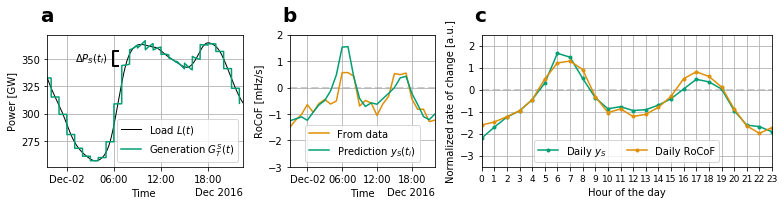

In [26]:
fig = plt.figure( figsize=(11,3.))
gs = gridspec.GridSpec(1, 3, width_ratios=[1.35,1, 2],)


#### ax1 - step function visualization ###

plt.subplot(gs[0])
start = '2016-12-01 21:00:00' 
end = '2016-12-02 22:00:00' 

# calculate smoothed load
smooth_load = X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[start:end].load
smooth_load.index += pd.DateOffset(minutes=30)
smooth_load = smooth_load.resample('1min').interpolate(method='cubic')

# Proxy for generation without solar
gen_imports_storage_wo_solar = X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[start:end].load - X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[start:end].gen_solar
gen_imports_storage_wo_solar = gen_imports_storage_wo_solar.resample('1min').ffill(59)

# smoothed solar generation
smooth_solar = X_test.mul(input_rescale_factors.reindex(X_test.columns)).loc[start:end].gen_solar
smooth_solar.index += pd.DateOffset(minutes=30)
smooth_solar = smooth_solar.resample('1min').interpolate(method='cubic')
smooth_load.index = smooth_load.index.tz_localize(None)
gen_imports_storage_wo_solar.index = gen_imports_storage_wo_solar.index.tz_localize(None)
smooth_solar.index = smooth_solar.index.tz_localize(None)

# Plots
plt.plot(smooth_load, label='Load $L(t)$', c='k', lw=1)
plt.plot(gen_imports_storage_wo_solar + smooth_solar, label='Generation $G_T^S(t)$', c=cpred)
plt.grid()
plt.ylabel('Power [GW]')
plt.xlabel('Time ')
locator = mdates.AutoDateLocator(minticks=4, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator, offset_formats=['', '%Y', '%Y-%b', '%b %Y', '%b %Y', '%Y-%b-%d %H:%M'])
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
dt = pd.DateOffset(minutes=40)
show_time = gen_imports_storage_wo_solar.index[11*60]-pd.DateOffset(minutes=90)
load_val_0, load_val_1 =  gen_imports_storage_wo_solar.iloc[11*60-1], gen_imports_storage_wo_solar.iloc[11*60]
plt.plot([show_time, show_time-dt, show_time-dt, show_time], [load_val_0,load_val_0, load_val_1, load_val_1], lw=2, c='k')
plt.text(show_time-5*dt, (load_val_1+load_val_0)*.5, r"$\Delta P_S (t_i)$", ha='center', va='center')
plt.autoscale(enable=True, axis='x', tight=True)
plt.annotate('a', (-0.05/1.3,1.1), fontweight='bold', xycoords='axes fraction', fontsize=20)
plt.legend(loc='lower right')

##### ax2 - prediction sample ####

plt.subplot(gs[1])

# Fit refined model 
f = lambda x,a,b: a*x + b 
popt, pcov = curve_fit(f, (X_train.load_ramp- X_train.solar_ramp).values, y_train.values)
y_pred_test_dPS = f(X_test.load_ramp- X_test.solar_ramp, *popt)
dPS_r2_score = r2_score(y_pred=y_pred_test_dPS, y_true=y_test)
print('Performance of refined model: ', dPS_r2_score)

# Plots
plt.plot(y_test.loc[start:end].index.tz_localize(None),
         y_test.loc[start:end].values*1000,'-',  c=crocof, label='From data')
plt.plot(y_test.loc[start:end].index.tz_localize(None),
         y_pred_test_dPS.loc[start:end].values*1000,'-',  c=cpred, 
         label='Prediction $y_S(t_i)$')
locator = mdates.AutoDateLocator(minticks=4, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator, offset_formats=['', '%Y', '%Y-%b', '%b %Y', '%b %Y', '%Y-%b-%d %H:%M'])
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.ylabel('RoCoF [mHz/s]')
plt.grid()
plt.legend(loc='lower center')
plt.xlabel('Time')
plt.ylim([-3,2.])
plt.plot([gen_imports_storage_wo_solar.index[0], gen_imports_storage_wo_solar.index[-1]],[0,0],
         '--', color='k', alpha=0.2, zorder=-100, lw=2)
plt.autoscale(enable=True, axis='x', tight=True)
plt.annotate('b', (-0.05,1.1), fontweight='bold', xycoords='axes fraction', fontsize=20)

##### ax3 - daily profile ####

plt.subplot(gs[2])

# calculate daily profile
daily_dPS = y_pred_test_dPS.groupby(y_pred_test_dPS.index.hour).mean()
daily_rocof = y_test.groupby(y_test.index.hour).mean()

# Plot normalized values
daily_dPS.div(daily_dPS.std()).plot(label='Daily $y_S$', c=cpred, style='.-')
daily_rocof.div(daily_rocof.std()).plot(grid=True, label='Daily RoCoF', c=crocof, style='.-')
plt.plot([0,23],[0,0],'--', color='k', alpha=0.2, zorder=-100, lw=2)
plt.ylim([-3.5,2.5])
_=plt.xticks(np.arange(24), fontsize=9)
plt.legend(ncol=2, loc='lower center')
plt.xlabel('Hour of the day')
plt.ylabel('Normalized rate of change [a.u.]')
plt.annotate('c', (-0.05/2,1.1), fontweight='bold', xycoords='axes fraction', fontsize=20)
print('Hours with sign mismatch of refined model:', np.argwhere((daily_dPS*daily_rocof<0).values))

plt.tight_layout(h_pad=0.1)

plt.savefig(plot_folder+ 'fig4.pdf', bbox_inches='tight', dpi=220)
